In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [68]:
fuel_data= pd.read_csv('measurements.csv')
fuel_data.head()


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [69]:
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [70]:
#Calculate the ratio of missing rows to total rows
fuel_data.isna().sum().sort_values(ascending=False)*100/len(fuel_data)

refill liters    96.649485
refill gas       96.649485
specials         76.030928
temp_inside       3.092784
distance          0.000000
consume           0.000000
speed             0.000000
temp_outside      0.000000
gas_type          0.000000
AC                0.000000
rain              0.000000
sun               0.000000
dtype: float64

In [71]:
# As refill liters,refill gas and specials columns have lots of missing rows so I will drop these columns.
fuel_data.drop(['refill liters','refill gas','specials'], axis=1,inplace=True)
fuel_data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,"4,2",30,"21,5",13,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,E10,0,0,0


In [72]:
fuel_data.isna().sum()

distance         0
consume          0
speed            0
temp_inside     12
temp_outside     0
gas_type         0
AC               0
rain             0
sun              0
dtype: int64

In [73]:
# handling null values using mode
mode = fuel_data['temp_inside'].mode()[0]
fuel_data_cleaned = fuel_data.copy()  # Creating a copy to avoid modifying the original DataFrame
fuel_data_cleaned['temp_inside'].fillna(mode, inplace=True)

In [74]:
fuel_data_cleaned.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

In [75]:
# replace ',', '.' in columns distance, consume and temp_inside and convert them to float
col = [ 'distance', 'consume', 'temp_inside']
for column in col:
    fuel_data_cleaned[column] = fuel_data_cleaned[column].str.replace(',','.').astype(float)


In [76]:
fuel_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   388 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 27.4+ KB


In [77]:
fuel_data_cleaned.gas_type.unique()

array(['E10', 'SP98'], dtype=object)

In [78]:
fuel_data2 = pd.read_excel('measurements2.xlsx')
fuel_data2.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [79]:
fuel_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [80]:
#Calculate the ratio of missing rows to total rows
fuel_data2.isna().sum().sort_values(ascending=False)*100/len(fuel_data2)

refill liters    96.649485
refill gas       96.649485
specials         76.030928
temp_inside       3.092784
distance          0.000000
consume           0.000000
speed             0.000000
temp_outside      0.000000
gas_type          0.000000
AC                0.000000
rain              0.000000
sun               0.000000
dtype: float64

In [81]:
# As refill liters,refill gas and specials columns have lots of missing rows so I will drop these columns.
fuel_data2.drop(['refill liters','refill gas','specials'], axis=1,inplace=True)
fuel_data2.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


In [82]:
fuel_data2.isna().sum()

distance         0
consume          0
speed            0
temp_inside     12
temp_outside     0
gas_type         0
AC               0
rain             0
sun              0
dtype: int64

In [91]:
# handling null values using mode
mode = fuel_data2['temp_inside'].mode()[0]
fuel_data2_cleaned = fuel_data2.copy()  # Creating a copy to avoid modifying the original DataFrame
fuel_data2_cleaned['temp_inside'].fillna(mode, inplace=True)

In [92]:
fuel_data2_cleaned.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

In [93]:
fuel_data2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   388 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 27.4+ KB


In [94]:
fuel_data_cleaned.merge(fuel_data2_cleaned, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun


 # Creating some new features

In [95]:
fuel_data_cleaned['temp_diff'] = fuel_data_cleaned['temp_inside'] - fuel_data_cleaned['temp_outside']

In [96]:
fuel_data_cleaned['fuel_used'] = fuel_data_cleaned['distance']*fuel_data_cleaned['consume']/100

In [97]:
fuel_data_cleaned.head()


,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,temp_diff,fuel_used
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5,1.4000
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5,0.5040
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5,0.6160
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5,0.5031
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5,0.8325


Current price of E10 and SP98 in Netherlands are:
E10 = 1.97
Sp98 = 2.294

In [98]:
fuel_data_cleaned['cost_of_trip'] = np.where(fuel_data_cleaned['gas_type'] == 'E10', fuel_data_cleaned['fuel_used'] * 1.97, fuel_data_cleaned['fuel_used'] * 2.294).round(3)

In [99]:
fuel_data_cleaned

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,temp_diff,fuel_used,cost_of_trip
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5,1.4000,2.758
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5,0.5040,0.993
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5,0.6160,1.214
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5,0.5031,0.991
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5,0.8325,1.640
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,6.5,0.5920,1.358
384,16.1,4.3,38,25.0,31,SP98,1,0,0,-6.0,0.6923,1.588
385,16.0,3.8,45,25.0,19,SP98,0,0,0,6.0,0.6080,1.395
386,15.4,4.6,42,25.0,31,SP98,1,0,0,-6.0,0.7084,1.625


In [100]:
fuel_data_cleaned.to_csv('Cobify_clean_data.csv', index=False)

# Data visualization

In [101]:
# Convert 'gas_type' to categorical
fuel_data_cleaned['gas_type'] = fuel_data_cleaned['gas_type'].astype('category')


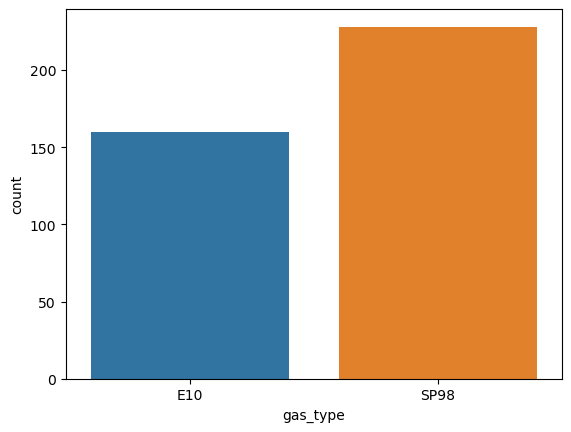

In [102]:
# Create count plot
sns.countplot(x='gas_type', data=fuel_data_cleaned)
plt.show()

In [103]:
# The plot shows that usage of SP98 is more than E10.

In [104]:
fig=px.violin(fuel_data_cleaned,x='AC',y='consume',color='AC',template='plotly_dark',box=True,title='Gas consumption with AC on/off')
fig.show()

In [105]:
# This shows that gas consuption is more when AC is on. It is obvious because with more usage of AC fuel consumption increases.

In [106]:
fig=px.violin(fuel_data_cleaned,x='rain',y='consume',color='rain',template='plotly_dark',box=True,title='Gas consumption with rain on/off')
fig.show()

Observation: This shows that gas consumption is more during rain. It could be due to many reasons like: traffic congestion, driver need more fuel to navigate safely, In heavy rain, traffic jams, or during prolonged stops, drivers may keep their engines running to power windshield wipers, defrosters, and other electrical systems, contributing to higher fuel consumption.

In [107]:
fig=px.violin(fuel_data_cleaned,x='sun',y='consume',color='sun',template='plotly_dark',box=True,title='Gas consumption with Sun on/off')
fig.show()

In [108]:
# This shows that gas consumption is more during cloudy weather and less when it is sunny.

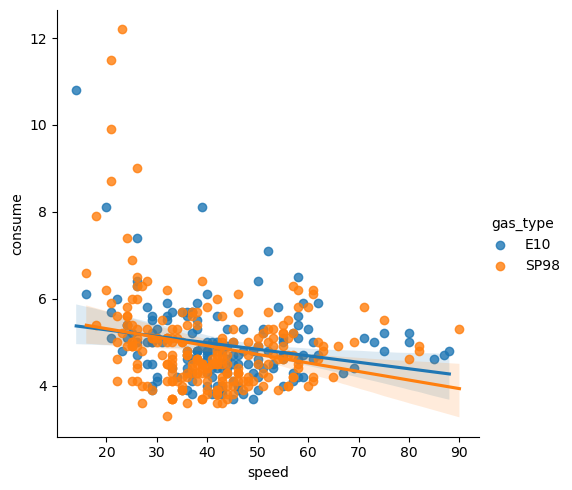

In [109]:
sns.lmplot(x='speed', y='consume', hue='gas_type', data=fuel_data_cleaned)
plt.show()

Observation: The plots shows that when the speed Increases fuel consumption decreases.

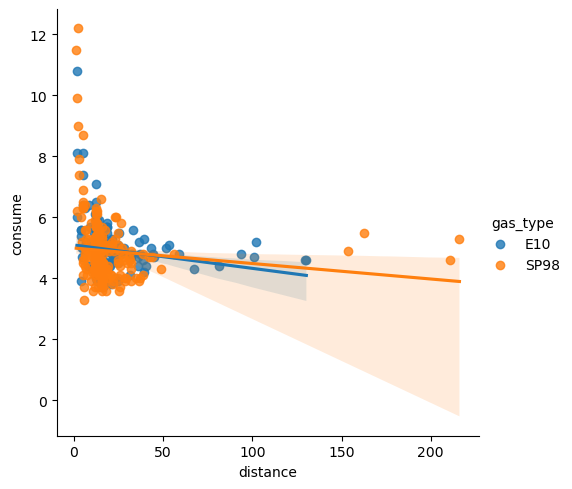

In [110]:
sns.lmplot(x='distance', y='consume', hue='gas_type', data=fuel_data_cleaned)
plt.show()

Observation: SP98 is used more for longer distance as compared to E10

<Figure size 2000x1000 with 0 Axes>

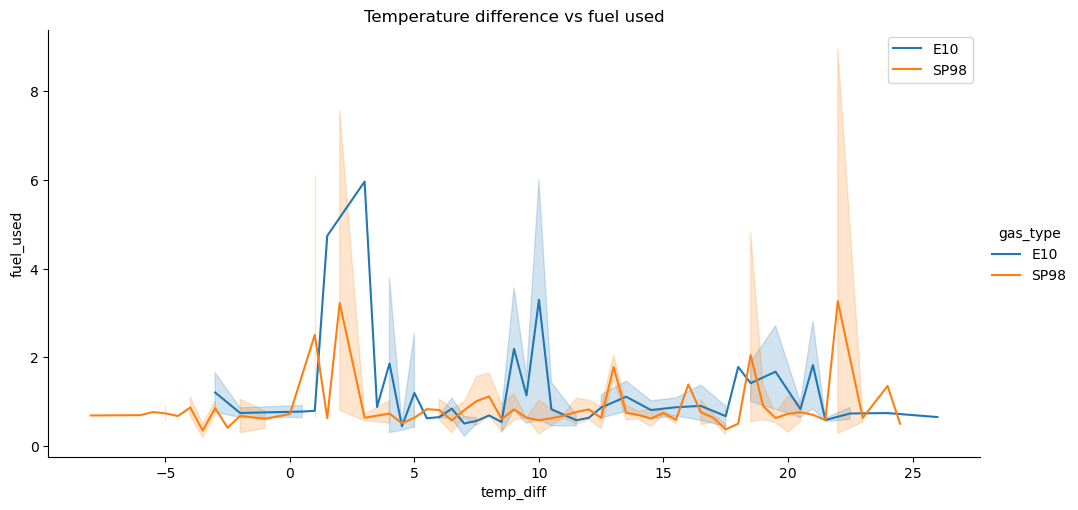

In [111]:
plt.figure(figsize=(20, 10))

sns.relplot(
    data=fuel_data_cleaned,
    x='temp_diff',
    y='fuel_used',
    hue='gas_type',  # Color points based on gas type
    kind='line',     # Use a line plot
    aspect=2,        # Aspect ratio of each subplot
)

plt.xlabel('temp_diff')
plt.ylabel('fuel_used')
plt.title('Temperature difference vs fuel used')
plt.legend()
plt.show()

Observation: The amount of different fuel used depends up on temperature difference. When temperature is low around 0-5 degree then E10 is more used. On the other hand when temp difference is more between 20 to 25 then SP98 is more used.

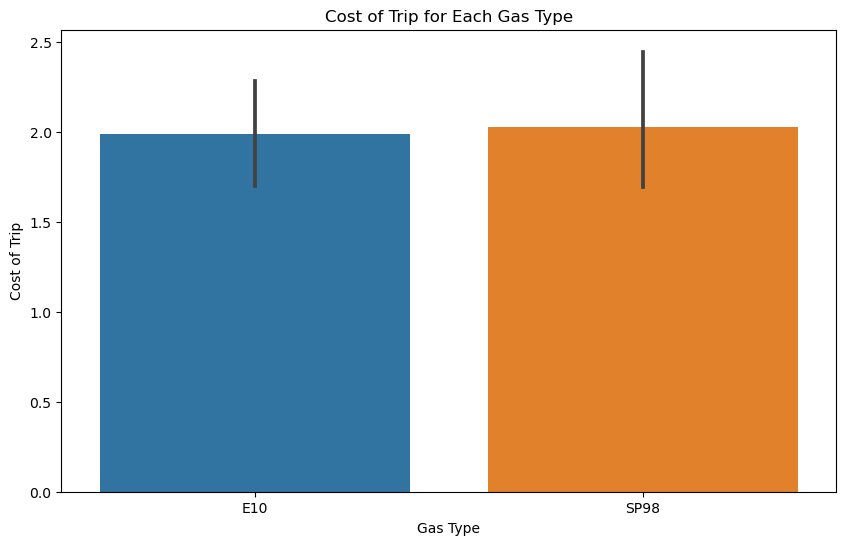

In [112]:
plt.figure(figsize=(10, 6))
sns.barplot(data=fuel_data_cleaned, x='gas_type', y='cost_of_trip')

plt.xlabel('Gas Type')
plt.ylabel('Cost of Trip')
plt.title('Cost of Trip for Each Gas Type')
plt.show()

Observation: The cost of trip for SP98 is v.slightly high than E10. May be as SP98 is more used for longer trip. so we couldn't compare becasuse we don't have data for longer trips of E10.

#Conclusion: 
From above analysis I could say both SP98 and E10 has advantages and disadvantages:

SP98 Advantages:

Longer Distances: SP98 is used more for longer distances, suggesting potential benefits in terms of fuel efficiency during long travel.

Temperature Performance: SP98 seems to be preferred in higher temperature differences (20 to 25 degrees), indicating better performance in certain temperature ranges. Higher temperatures can pose additional challenges to engine performance, and using a fuel with higher octane rating may help mitigate some of these challenges. 

Extra milage: Using higher octane fuel may improve performance and mileage and even reduce CO2 emissions when the vehicle is working hard, such as when towing a trailer or carrying heavier than normal cargo, especially in hotter weather.

Disadvantage: Expensive and more benificial in hot weather, though it is not limited to hot weather alone.

E10 Advantages:

Cost: Cost effective or cheaper

Temperatures: E10 is more used in colder temperatures (around 0-5), suggesting potential advantages in cold weather conditions.Though, It is an effective antifreeze/moisture remover so no additional additive is necessary.” Whatever the season or weather, ethanol-blended fuel is a smart option for so many reasons. 

Disadvantages: Hamper milage, performance issues and probability of equipment damage etc.


Factors to Consider:

AC Usage: If AC usage is a significant concern, SP98 might be less favorable due to higher fuel consumption when the AC is on.

Rainy Weather: If driving in rainy conditions is common, the observed higher fuel consumption during rain could be a consideration.

Speed Dependency: If fuel efficiency at higher speeds is crucial, the observation that fuel consumption decreases with increased speed may be a factor.

Environmental Impact: Consider the environmental impact of each fuel type, including emissions and sustainability.
Availability: The availability of fuel types in your location might influence the practicality of using one over the other.

#In summary, I will say for frequently driving long distance and driving involves scenarios where the engine is under stress (towing, heavy cargo, hot weather), also in hot weather, SP98 is advantageous. 

Considering other factors like AC usage and driving in rainy conditions are common and especially if higher speeds are crucial for your driving habits, also ,if cost is significant factor than E10 might be more attractive as it is cost effective.

But it is advisable to consider factors like engine design, load, and driving conditions and availabilty of fuel when choosing the appropriate fuel for your vehicle.